In [1]:
import importlib
import VanillaChord as vc
importlib.reload(vc)

def print_fingers(node, m=8):
    print(f'Finger table of {node.ID}')
    print('start | interval | finger')
    for i in range(m):
        print(str(node.FingerTable['start'][i]) + ' | ' + str(node.FingerTable['interval'][i]) + ' | ' + str(node.FingerTable['finger'][i].ID))
    return

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

mpl.rcParams['figure.dpi'] = 300

def plot_Chord(pts, m, title_str=r'Chord Example Graph, $M=8$, $Q=256$'):
    '''
    pts: list (int)
        List of Node IDs
    m: int
        Length of key representation in bits
    title_str:
        Title for plot
    '''
    
    MAX = 2**m
    pts.append(MAX)
    pts = np.array(pts)
    angles = -2*np.pi*((pts%MAX)/MAX) + np.pi/2
    xs, ys = np.cos(angles), np.sin(angles)
    
    fig, ax = plt.subplots()
    ax.set_xlim((-2, 2))
    ax.set_ylim((-2, 2))
    circle = patches.Circle((0, 0), radius=1, fill=False)
    ax.add_patch(circle)
    plt.scatter(xs[:-1], ys[:-1], c='b')
    plt.scatter(xs[-1], ys[-1], c='r')
    tau = 1.5
    for i, txt in enumerate(pts):
        ax.annotate(txt, (tau*xs[i], tau*ys[i]), size=8)
    
    plt.xticks([])
    plt.yticks([])
    plt.title(title_str)
    plt.show()

# Validation Example

Using the example of https://medium.com/@jingyang_56841/key-lookup-in-chord-with-finger-table-c0179bafae13 for validation.

Join of node 2:
Finger table of 45
start | interval | finger
46 | (46, 47) | 132
47 | (47, 49) | 132
49 | (49, 53) | 132
53 | (53, 61) | 132
61 | (61, 77) | 132
77 | (77, 109) | 132
109 | (109, 173) | 132
173 | (173, 45) | 45
Finger table of 132
start | interval | finger
133 | (133, 134) | 45
134 | (134, 136) | 45
136 | (136, 140) | 45
140 | (140, 148) | 45
148 | (148, 164) | 45
164 | (164, 196) | 45
196 | (196, 4) | 45
4 | (4, 132) | 45
Join of node 3:
Finger table of 45
start | interval | finger
46 | (46, 47) | 99
47 | (47, 49) | 99
49 | (49, 53) | 99
53 | (53, 61) | 99
61 | (61, 77) | 99
77 | (77, 109) | 99
109 | (109, 173) | 132
173 | (173, 45) | 45
Finger table of 99
start | interval | finger
100 | (100, 101) | 132
101 | (101, 103) | 132
103 | (103, 107) | 132
107 | (107, 115) | 132
115 | (115, 131) | 132
131 | (131, 163) | 132
163 | (163, 227) | 45
227 | (227, 99) | 45
Join of node 4:
Finger table of 45
start | interval | finger
46 | (46, 47) | 99
47 | (47, 49) | 99
49 | (49, 53)

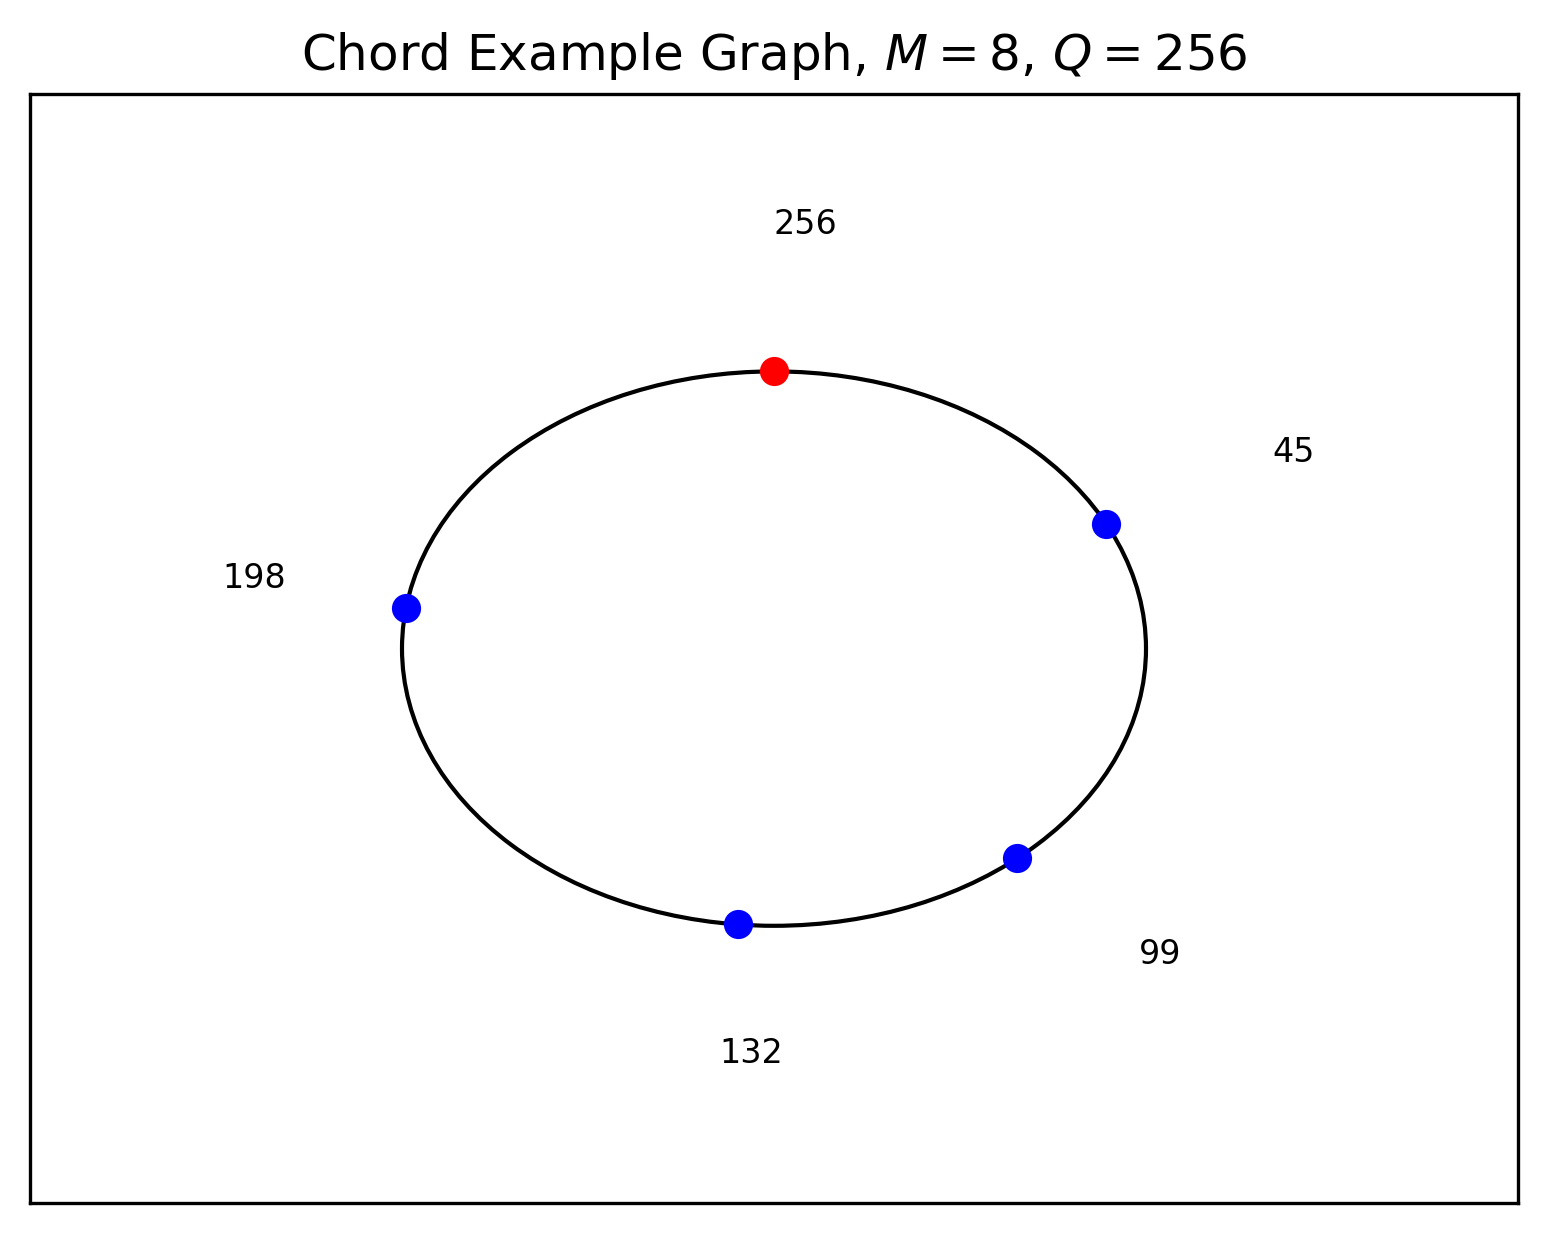

In [3]:
# Initializing nodes
v1 = vc.Chord_Node(45, 8)
v2 = vc.Chord_Node(132, 8)
v3 = vc.Chord_Node(99, 8)
v4 = vc.Chord_Node(198, 8)

v1.join(v1)
v2.join(v1)
print('Join of node 2:')
print_fingers(v1)
print_fingers(v2)
v3.join(v1)
print('Join of node 3:')
print_fingers(v1)
print_fingers(v3)
v4.join(v1)
print('Join of node 4:')
print_fingers(v1)
print_fingers(v4)

print('Final tables')
print_fingers(v1)
print_fingers(v2)
print_fingers(v3)
print_fingers(v4)

nodes = [45, 99, 132, 198]
plot_Chord(nodes, 8)

In [4]:
x = np.arange(10)
y_bot = np.linspace(30, 50, 10)
y_dif = np.linspace(10, 5, 10)

def whisker_plot(x, y_bot, y_diff, ylabel="", xlabel="", title="", \
                 errbarlabel = r"$5^{th}$, $95^{th}$ percentiles", \
                 centerlabel=r"$50^{th}$ percentile", \
                line=True):
    if line:
        print(np.zeros_like(y_bot).shape)
        print(y_diff.shape)
        plt.errorbar(x, y_bot, yerr=(np.zeros_like(y_bot), y_diff), capsize=1, \
                     ecolor='black', ls='', lw=1, capthick=1, \
                     label=errbarlabel, alpha=0.6)
        plt.plot(x, y_bot + (1/2)*y_diff, marker='d', \
                 color='black', linestyle='--', \
                 label=centerlabel, alpha=0.6)
    else:
        plt.errorbar(x, y_bot, yerr=(np.zeros_like(y_bot), y_diff), capsize=1, \
                     ecolor='black', ls='', lw=1, capthick=1, \
                     label=errbarlabel, alpha=0.6)
        plt.plot(x, y_bot + (1/2)*y_diff, marker='d', color='black', \
                 ls='', label=centerlabel, alpha=0.6)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    return

def plot_PDF(x_values, y_values, xlabel="X-values", ylabel="PDF", title=""):
    plt.plot(x_values, pdf_values, c='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    return

#whisker_plot(x, y_bot, y_dif)
#whisker_plot(x, y_bot, y_dif, line=False)

In [5]:
'''
Plotting the results from VanillaChordIntegrated over 8-512 nodes and 10 random iterations per node number
'''
num_nodes = [8, 16, 32, 64, 128, 256, 512]
ChordLatencies=[[6.145897979842854, 7.647225959804466, 8.543224659781556, 9.174053539765426, 9.335117339761307, 9.289374179762477, 9.187714039765076],
                [6.454260999834969, 7.744696879801974, 8.587016319780435, 9.039139839768875, 9.225755279764103, 9.124953799766681, 9.405605519759504],
                [6.462327199834763, 7.8101371798003, 8.568125799780919, 8.84419799977386, 9.10546481976718, 9.173324979765445, 9.328091939761487],
                [6.21175459984117, 7.589643699805938, 8.590190759780354, 8.882785659772873, 9.108222939767108, 9.171763779765485, 9.465477539757973],
                [6.2331430398406225, 7.617849379805217, 8.380209359785724, 8.822913639774404, 9.063416499768255, 9.408051399759442, 9.421269559759105],
                [6.417182499835917, 7.515018339807846, 8.680271999778052, 8.870868499773177, 9.147591199766103, 9.146602439766127, 9.377816159760215],
                 [6.478849899834341, 7.708581119802897, 8.544837899781514, 8.916039219772022, 9.029512439769121, 9.216752359764333, 9.38900475975993],
                 [6.357180379837451, 7.693099219803293, 8.489935699782919, 9.017621299769425, 9.12185741976676, 9.469822879757864, 9.462641359758047],
                 [5.244226919865909, 7.963264879796385, 8.248782339789084, 8.754168799776162, 9.240586679763725, 9.360981219760646, 9.445806419758478],
                 [6.410209139836096, 7.745685639801948, 8.505417599782522, 8.746544939776356, 9.40386217975955, 9.420150699759134, 9.221826259764205]]
NumHops = [[3.35, 3.968, 4.283, 4.827, 5.415, 5.851, 6.4],
           [3.415, 3.955, 4.358, 4.835, 5.334, 5.885, 6.399],
           [ 3.188,  3.834,  4.395,  4.93,  5.484,  5.779, 6.246],
           [3.3, 3.931, 4.355, 4.867, 5.396, 5.977, 6.337],
           [3.347, 3.728, 4.29, 4.824,5.419, 5.872, 6.309],
           [3.318, 3.929, 4.316, 4.85, 5.387, 5.769, 6.467],
           [3.408, 3.942, 4.503, 4.783, 5.446, 5.759, 6.303],
           [3.44, 3.795, 4.274, 4.798, 5.405, 5.88, 6.453],
           [3.512, 3.901, 4.342, 4.927, 5.605, 5.818, 6.348],
           [ 3.353, 3.731, 4.475, 4.881, 5.247, 5.753, 6.428]]

(7,)
(7,)


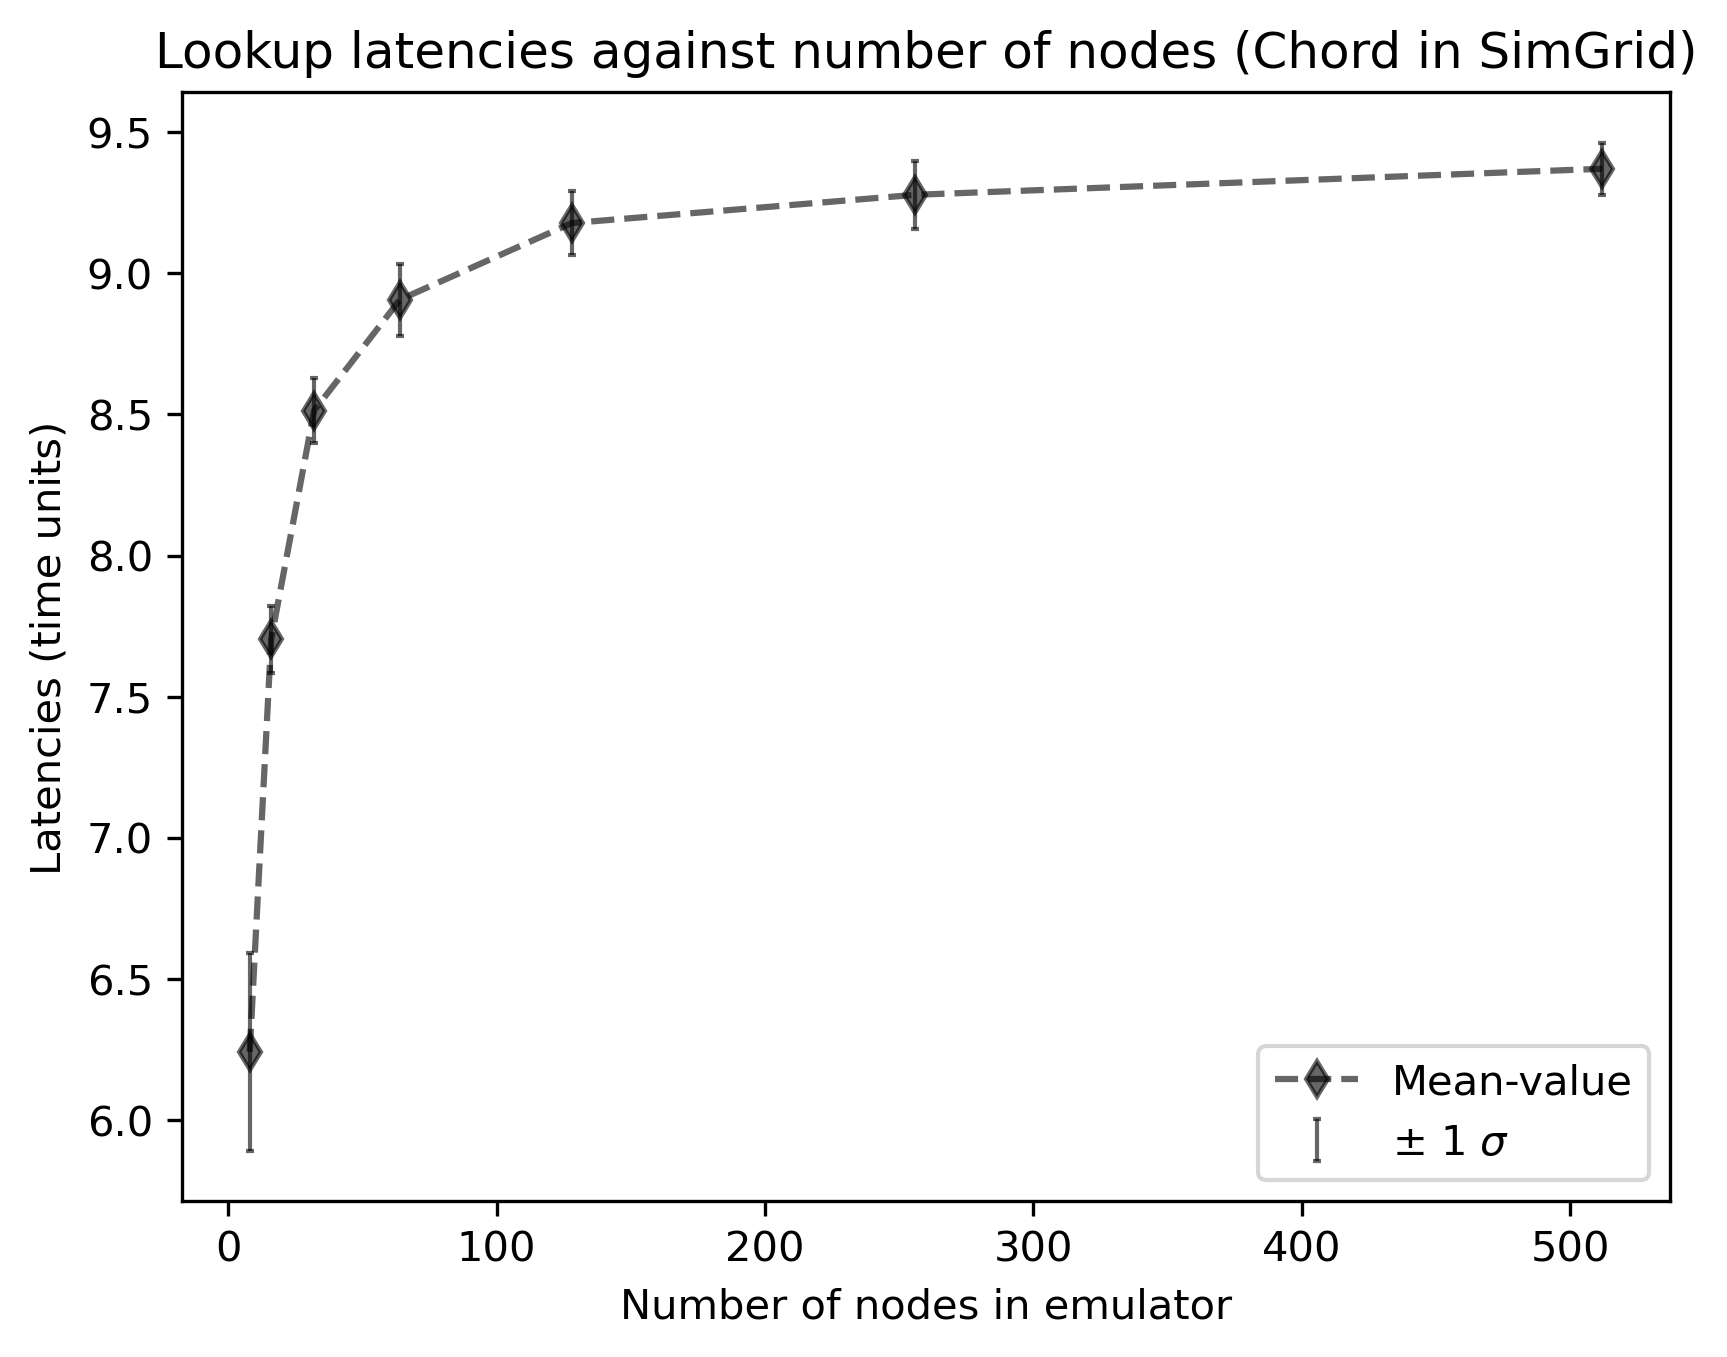

(7,)
(7,)


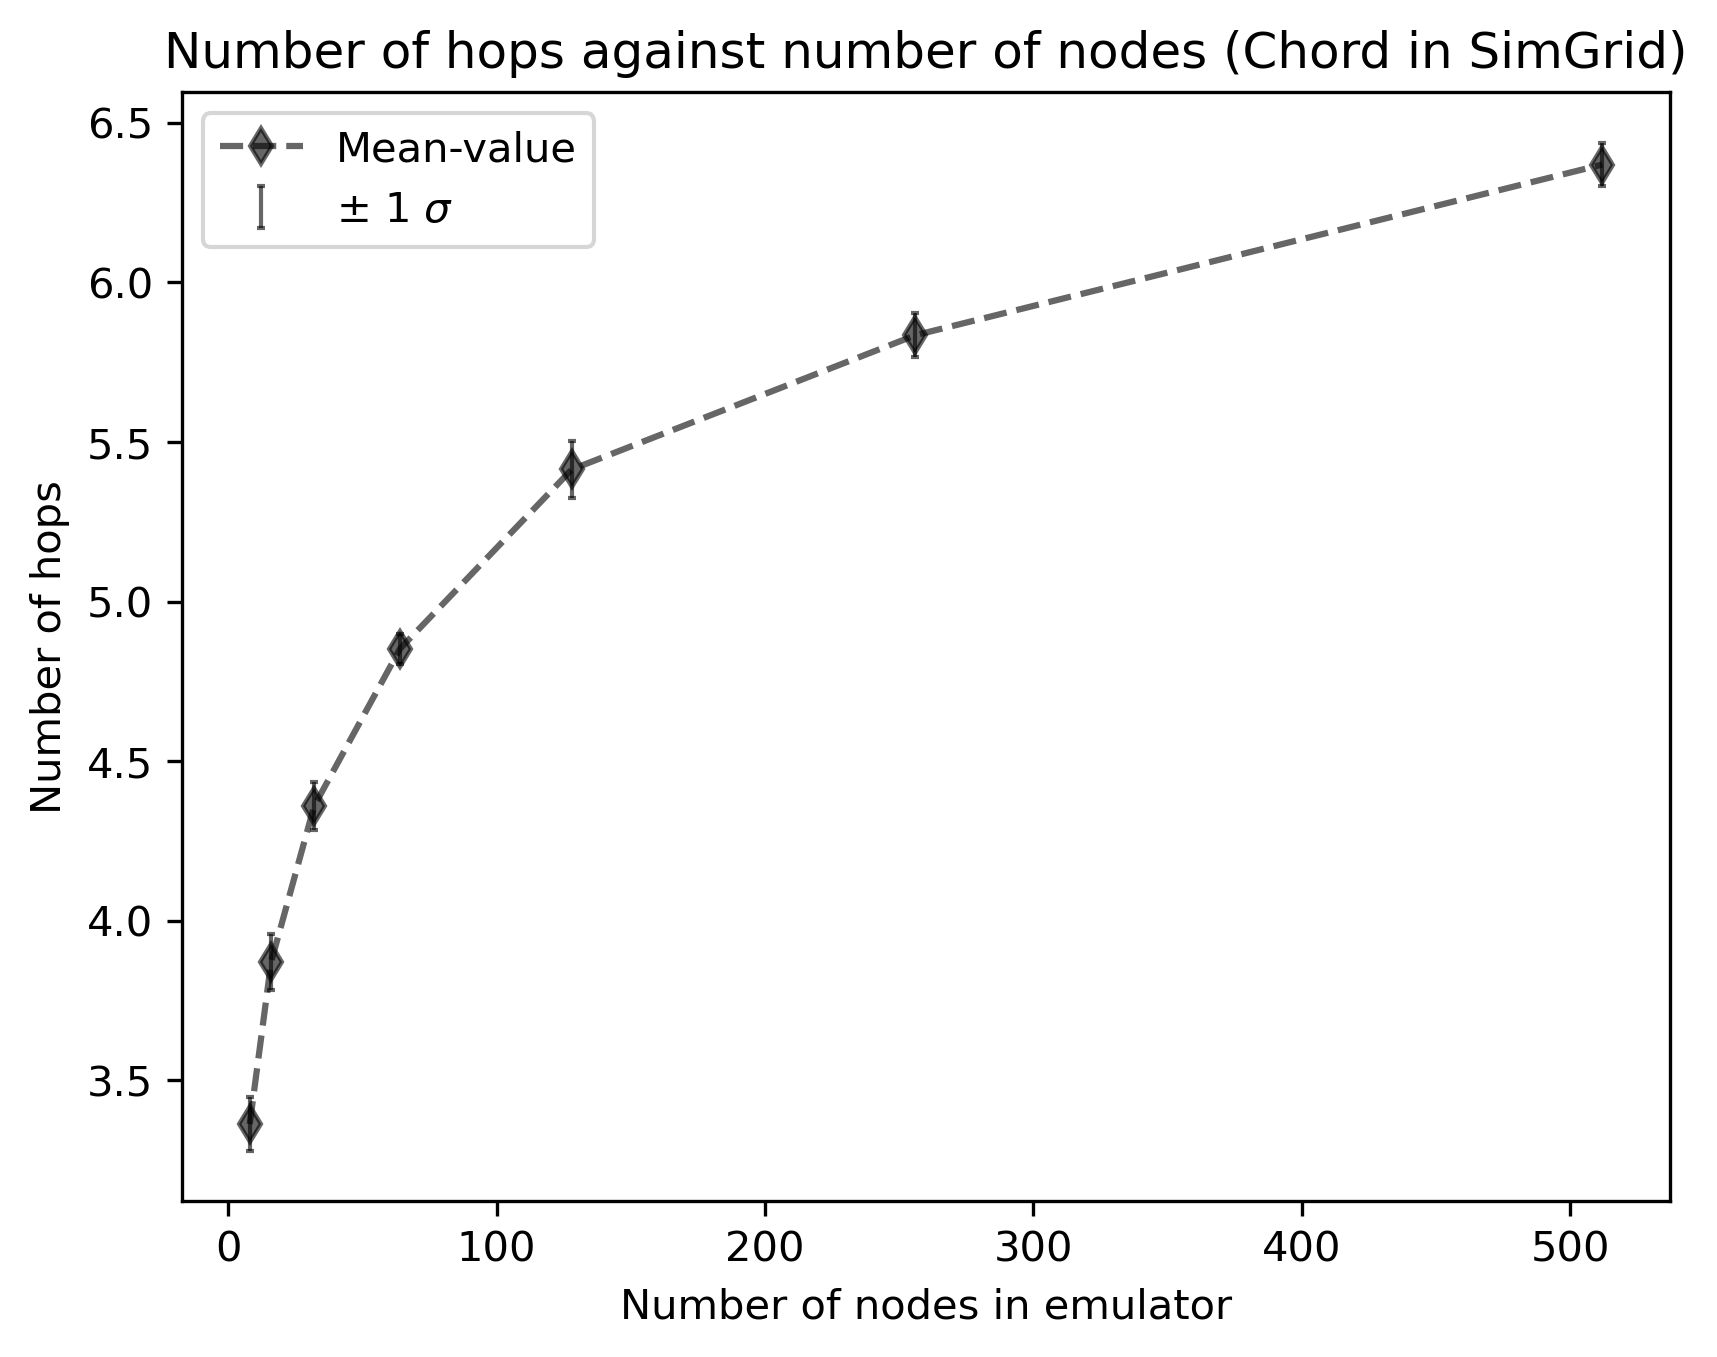

In [6]:
data_CL, data_hops = np.array(ChordLatencies), np.array(NumHops)
xnodes = np.array(num_nodes)

mean_CL = np.mean(data_CL, axis=0)
mean_hops = np.mean(data_hops, axis=0)

std_CL = np.std(data_CL, axis=0)
std_hops = np.std(data_hops, axis=0)

whisker_plot(xnodes, (mean_CL - std_CL), 2*std_CL, ylabel="Latencies (time units)", \
             xlabel="Number of nodes in emulator", \
             title="Lookup latencies against number of nodes (Chord in SimGrid)",\
            errbarlabel = r"$\pm$ 1 $\sigma$", \
                 centerlabel=r"Mean-value")

whisker_plot(xnodes, (mean_hops - std_hops), 2*std_hops, ylabel="Number of hops",\
             xlabel="Number of nodes in emulator",\
             title="Number of hops against number of nodes (Chord in SimGrid)", \
            errbarlabel = r"$\pm$ 1 $\sigma$", \
                 centerlabel=r"Mean-value")